# AEDT connect session example

This example shows how to use the Common AEDT API to
connect to an existing  AEDT session,
create a HFSS design and create a waveguide.

## Perform required imports

Perform the required imports.

In [1]:
import os
import sys
from ansys.aedt.toolkits.common.backend.api import AEDTCommon
import ansys.aedt.core

## Initialize toolkit

Initialize the toolkit.

In [2]:
toolkit = AEDTCommon()

## Get toolkit properties

Get the toolkit properties, which contain the project information.

In [3]:
properties_from_backend = toolkit.get_properties()

In [4]:
# ## Initialize AEDT
#
# Initialize AEDT using PyAEDT and then release it.
ansys.aedt.core.settings.enable_logger = False
app = ansys.aedt.core.Desktop(specified_version=properties_from_backend["aedt_version"],
                     non_graphical=properties_from_backend["non_graphical"])
app.release_desktop(close_projects=False, close_on_exit=False)

True

## Get AEDT sessions

Get AEDT sessions and select the first one.

In [5]:
sessions = toolkit.aedt_sessions()
first_key, first_value = next(iter(sessions.items()))
if first_value == -1:
    use_grpc = False
    selected_process = first_key
else:
    use_grpc = True
    selected_process = first_value

DEBUG - Active AEDT sessions: {4500: 59387}.


## Set properties

Specify the AEDT session selection.

In [6]:
new_properties = {"selected_process": selected_process, "use_grpc": use_grpc}
flag, msg = toolkit.set_properties(new_properties)

INFO - Updating internal properties.


DEBUG - Updating 'selected_process' with value 59387


DEBUG - Updating 'use_grpc' with value True


DEBUG - Properties were updated successfully.


## Initialize AEDT

Launch a new AEDT session in a thread.

In [7]:
thread_msg = toolkit.launch_thread(toolkit.launch_aedt)

DEBUG - Starting thread: Toolkit_Thread


DEBUG - Toolkit is not connected to AEDT.


DEBUG - Launching AEDT.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


## Wait for the toolkit thread to be idle

Wait for the toolkit thread to be idle and ready to accept a new task.

In [8]:
idle = toolkit.wait_to_be_idle()
if not idle:
    print("AEDT not initialized.")
    sys.exit()

DEBUG - Toolkit is idle and ready to accept a new task.


## Connect design

Connect or create a new design.

In [9]:
toolkit.connect_design("HFSS")

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.14.0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_e638bb2e-a383-45ec-a1f8-9cc1f7fbfc85.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 59387.


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


DEBUG - Toolkit is connected to AEDT.


PyAEDT WARNING: Argument `designname` is deprecated for method `__init__`; use `design` instead.


PyAEDT WARNING: Argument `projectname` is deprecated for method `__init__`; use `project` instead.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.14.0.


PyAEDT INFO: Returning found Desktop session with PID 4500!


PyAEDT INFO: Project Project1276 has been created.


PyAEDT INFO: Added design 'HFSS_UU7XR4' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: Project Project1276 Saved correctly


DEBUG - Project name: Project1276


INFO - Updating internal properties.


DEBUG - Updating 'project_list' with value ['C:/Users/ansys/Documents/Ansoft/Project1276.aedt']


DEBUG - Updating 'active_design' with value HFSS_UU7XR4


DEBUG - Updating 'active_project' with value C:/Users/ansys/Documents/Ansoft/Project1276.aedt


DEBUG - Updating 'design_list' with value {'Project1276': ['HFSS_UU7XR4']}


DEBUG - Properties were updated successfully.


INFO - Toolkit is connected to AEDT design.


True

## Get toolkit properties

Get the toolkit properties, which contain the project information.

In [10]:
new_properties = toolkit.get_properties()

## Create a waveguide

Create a waveguide in the design.

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 6sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Parsing design objects. This operation can take time


PyAEDT INFO: Refreshing bodies from Object Info


PyAEDT INFO: Bodies Info Refreshed Elapsed time: 0m 0sec


PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


PyAEDT INFO: Parsing C:/Users/ansys/Documents/Ansoft/Project1276.aedt.


PyAEDT INFO: File C:/Users/ansys/Documents/Ansoft/Project1276.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.01685476303100586


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


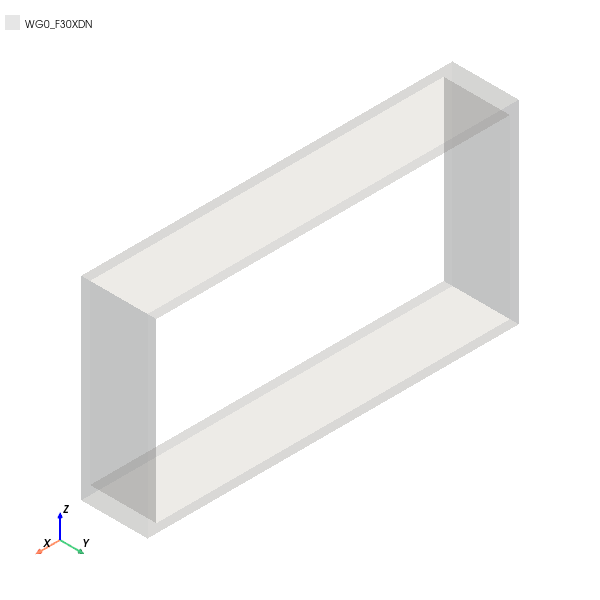

True

In [11]:
wg = toolkit.aedtapp.modeler.create_waveguide([0, 0, 0], 1)
model = toolkit.aedtapp.plot(show=False)
model.show_grid = False
model.plot(os.path.join(toolkit.aedtapp.working_directory, "Image.jpg"))

## Save and release AEDT

Save and release AEDT.

In [12]:
toolkit.release_aedt(True, True)

PyAEDT INFO: Desktop has been released and closed.


INFO - AEDT is released.


True